# Praca domowa 6
Ewa J-Szaniawska
źródło: https://www.kaggle.com/datasets/srgiomanhes/steam-games-dataset-2025

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("steam_games.csv")
df = pd.DataFrame(df)
df.head()

,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,...,additional_content,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD)
0,2719580,勇者の伝説の勇者,['ぽけそう'],['ぽけそう'],"['Single-player', 'Family Sharing']","['Casual', 'Indie']",0,0,['windows'],True,...,[],0,0,0,0.0,No user reviews,0.0,0,False,0.99
1,2719590,Light No Fire,['Hello Games'],['Hello Games'],"['Single-player', 'Multi-player', 'Co-op', 'On...","['Action', 'Adventure']",0,0,['windows'],False,...,[],0,0,0,0.0,No user reviews,0.0,0,False,0.00
2,2719600,Lorhaven: Cursed War,['GoldenGod Games'],['GoldenGod Games'],"['Single-player', 'Multi-player', 'PvP', 'Shar...","['RPG', 'Strategy']",0,32,"['windows', 'mac']",True,...,[],9,8,1,0.0,9 user reviews,88.9,0,False,9.99
3,2719610,PUIQ: Demons,['Giammnn'],['Giammnn'],"['Single-player', 'Steam Achievements', 'Famil...","['Action', 'Casual', 'Indie', 'RPG']",0,28,['windows'],True,...,[],0,0,0,0.0,No user reviews,0.0,0,False,2.99
4,2719650,Project XSTING,['Saucy Melon'],['Saucy Melon'],"['Single-player', 'Steam Achievements', 'Steam...","['Action', 'Casual', 'Indie', 'Early Access']",0,42,['windows'],True,...,[],9,9,0,0.0,9 user reviews,100.0,0,False,7.99


## Zadanie 1

In [3]:
df.isna().sum().sum() # rano tu jeszcze było napisane np.int64(3), naprawdę

np.int64(0)

In [4]:
df.shape

(71429, 21)

Ten zestaw danych agreguje informacje o grach (np. nazwa, gatunek, recenzje, cena). Każdy wiersz reprezentuje jedną grę.

wielkość: 71429 (wierszy)

liczba kolumn: 21

liczba braków danych: 3

typy zmiennych:

| kolumna | typ zmiennej |
|---------|--------------|
|steam_appid|jakościowa, nominalna|
|name|jakościowa, nominalna|
|developers|jakościowa, nominalna|
|publishers|jakościowa, nominalna|
|categories|jakościowa, nominalna|
|genres|jakościowa, nominalna|
|required_age|ilościowa, ilorazowa|
|n_achievements|ilościowa, ilorazowa|
|platforms|jakościowa, nominalna|
|is_released|jakościowa, binarna|
|release_date|ilościowa, przedziałowa|
|additional_content|jakościowa, nominalna|
|total_reviews|ilościowa, ilorazowa|
|total_positive|ilościowa, ilorazowa|
|total_negative|ilościowa, ilorazowa|
|review_score|ilościowa, ilorazowa|
|review_score_desc|jakościowa, uporządkowana|
|positive_percentual|ilościowa, ilorazowa|
|metacritic|ilościowa|
|is_free	object|jakościowa, binarna|
|price_initial (USD)|ilościowa, ilorazowa|


In [5]:
df.dtypes

,0
steam_appid,int64
name,object
developers,object
publishers,object
categories,object
genres,object
required_age,int64
n_achievements,int64
platforms,object
is_released,bool


## Zadanie 2

In [6]:
df.drop("steam_appid", axis=1).describe()

,required_age,n_achievements,total_reviews,total_positive,total_negative,review_score,positive_percentual,metacritic,price_initial (USD)
count,71429.000000,71429.000000,7.142900e+04,7.142900e+04,71429.000000,71429.000000,71429.000000,71429.000000,71429.000000
mean,2.573227,16.079478,4.102497e+02,3.602238e+02,50.025886,2.192849,46.113290,2.573227,6.528184
std,13.591997,138.084319,8.389934e+03,7.409672e+03,1171.055349,3.175885,41.961702,13.591997,13.186426
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000e+00,2.000000e+00,0.000000,0.000000,50.000000,0.000000,2.990000
75%,0.000000,16.000000,1.900000e+01,1.400000e+01,4.000000,5.000000,88.000000,0.000000,9.990000
max,97.000000,9821.000000,1.279700e+06,1.107275e+06,172425.000000,9.000000,100.000000,97.000000,999.980000


### Wymagany wiek

Zwróćmy uwagę, że max w kolumnie *required_age* to 97. Sprawdźmy, jakiej gry/gier to dotyczy

In [7]:
df[df["required_age"]==97]

,steam_appid,name,developers,publishers,categories,genres,required_age,n_achievements,platforms,is_released,...,additional_content,total_reviews,total_positive,total_negative,review_score,review_score_desc,positive_percentual,metacritic,is_free,price_initial (USD)
65980,632470,Disco Elysium - The Final Cut,['ZA/UM'],['ZA/UM'],"['Single-player', 'Steam Achievements', 'Full ...",['RPG'],97,45,"['windows', 'mac']",True,...,[],48258,44896,3362,8.0,Very Positive,93.0,97,False,39.99


Grą z największym wymaganym wiekiem gracza jest "Disco Elysium - The Final Cut"

In [28]:
df[df["genres"].str.contains("Nudity")].groupby("required_age")["required_age"].count().sort_values(ascending=False)

,required_age
required_age,
0,60
75,1


Cóż... tym danym nie powinniśmy jakoś szczególnie wierzyć, bo absurdalne jest, że wymagany wiek dla gry związanej z nagością jest 0. To jedno wystąpienie 75 też nie wygląda wiarygodnie.

## Zadanie 3

### Systemy operacyjne

In [10]:
df.groupby("platforms")["positive_percentual"].mean().sort_values(ascending=False)

,positive_percentual
platforms,
"['mac', 'linux']",84.100000
"['windows', 'mac', 'linux']",59.731608
"['windows', 'mac']",53.379829
"['windows', 'linux']",48.954653
['windows'],43.301068
['mac'],15.961905
['linux'],6.533333


Średnio najbardziej pozytywne recenzje mają gry obsługiwane przez systemy operacyjne macOS i linux, a najmniej - tylko linux.

In [11]:
df.groupby("platforms")["positive_percentual"].count().sort_values(ascending=False)

,positive_percentual
platforms,
['windows'],54889
"['windows', 'mac', 'linux']",7362
"['windows', 'mac']",6539
"['windows', 'linux']",2611
['mac'],21
['linux'],6
"['mac', 'linux']",1


Nic dziwnego, że średnio najbardziej pozytywne recenzje mają gry obsługiwane przez sytemy operacyjne macOS i linux, bo jest tylko jedna taka gra.

Najwięcej gier jest dostępnych tylko na Windowsie.

In [9]:
df.shape[0]-df['platforms'].str.split(',').explode().str.strip().str.replace(']', '', regex=False).str.replace('[', '', regex=False).value_counts()

,count
platforms,
'windows',28
'mac',57506
'linux',61449


Zdecydowana większość gier jest dostępna na Windowsie - tylko 28 nie. Linux i macOS obsługują porównywalną liczbę gier, przy czym linux trochę więcej.

## Zadanie 4

### Gatunki

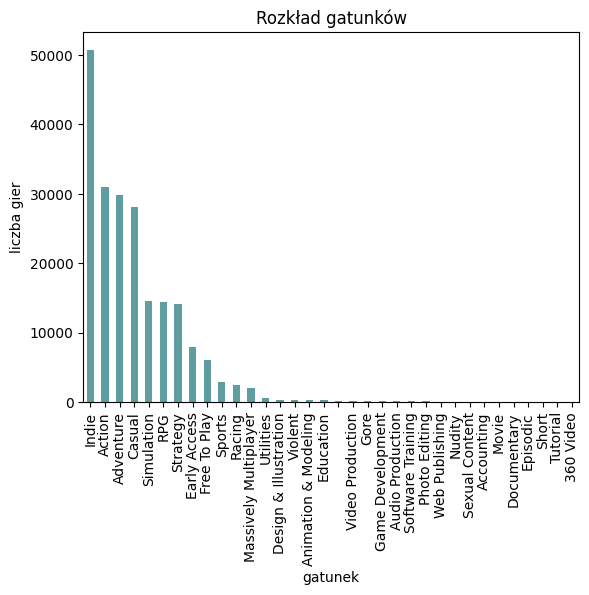

In [104]:
genres = df['genres'].str.split(',').explode().str.strip().str.replace(']', '', regex=False).str.replace('[', '', regex=False).str.replace("'", '', regex=False).value_counts()
genres.plot(kind='bar', color='cadetblue')
plt.title('Rozkład gatunków')
plt.xlabel('gatunek')
plt.ylabel('liczba gier')
plt.show()

Najpopularniejsze gatunki gier to indie, action i adventure. Dosyć popularne są też symulatory, gry strategiczne i typu RPG.
Niewielkim zainteresowaniem cieszą się gry związane ze sportem i wyścigami.



## Zadanie 5

### Cena a ocena

<ipython-input-145-b24196744c1d>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.violinplot(data=df, x="is_free", y="review_score", color = "darkcyan").set_xticklabels(["płatne", "darmowe"])


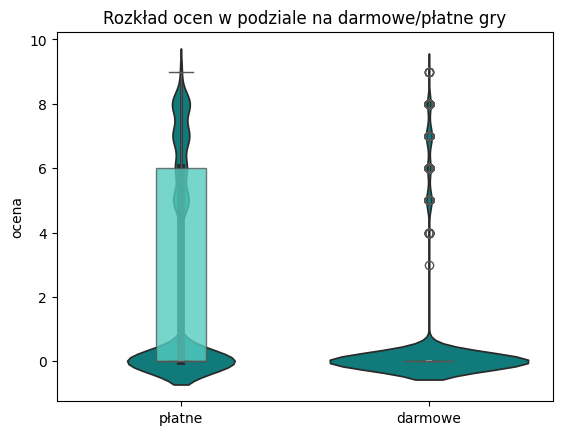

In [145]:
df2 = df[df["required_age"]>0]
sns.violinplot(data=df, x="is_free", y="review_score", color = "darkcyan").set_xticklabels(["płatne", "darmowe"])
sns.boxplot(data=df, x="is_free", y="review_score", color = "turquoise", width=0.2, boxprops=dict(alpha=0.8))
plt.title('Rozkład ocen w podziale na darmowe/płatne gry')
plt.ylabel("ocena")
plt.xlabel("")
plt.show()

Zdecydowana większość darmowych gier ma gardzo niskie oceny - z pojedynczymi wyjątkami. Przy płatnych grach to się rozkłada równomierniej.

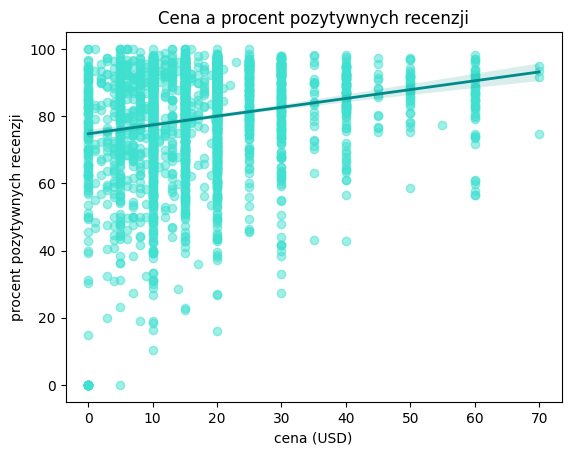

In [117]:
df2 = df[df["required_age"]>0] # lepiej nie brać pod uwagi tych danych, bo bardzo zaburzają
sns.regplot(data=df2, x="price_initial (USD)", y="positive_percentual",
            scatter_kws={'color': 'turquoise', 'alpha': 0.5},
            line_kws={'color': 'darkcyan', 'linewidth': 2})
plt.title('Cena a procent pozytywnych recenzji')
plt.xlabel('cena (USD)')
plt.ylabel('procent pozytywnych recenzji')
plt.show()

Na wykresie widać tendencję, że im droższa gra, tym wyższy jest procent pozytywnych recenzji.

<ipython-input-136-c79e5904a1ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["price_initial (USD)"] = round(df3["price_initial (USD)"] / 10) * 10
<ipython-input-136-c79e5904a1ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["price_initial (USD)"] = df3["price_initial (USD)"].astype(int)


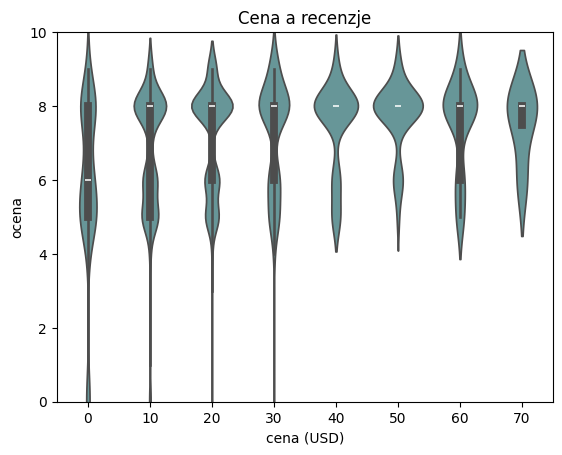

In [136]:
df3 = df[df["required_age"]>0]
df3["price_initial (USD)"] = round(df3["price_initial (USD)"] / 10) * 10
df3["price_initial (USD)"] = df3["price_initial (USD)"].astype(int)
df3.groupby(["review_score", "price_initial (USD)"])["review_score"].count().sort_values(ascending=False)
sns.violinplot(data=df3, x="price_initial (USD)", y="review_score", color = "cadetblue")
plt.ylim(0, 10)
plt.title('Cena a recenzje')
plt.xlabel('cena (USD)')
plt.ylabel('ocena')
plt.show()

Podobną zależność widzimy na wykresie typu violin plot pokazującym rozkład ocen w różnych kategoriach cenowych.